<a href="https://colab.research.google.com/github/ahmed05islam-del/a7med/blob/main/Part_4_S2_CNN_to_classify_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Reshape data to include channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values (0–255 → 0–1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [22]:
model = models.Sequential([
    # Change the last number in input_shape from 3 to 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Your new Task 1 layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # Ensure this matches your number of classes
])

<div dir= "rtl">
- ابدا بشبكة بسيطة من 2 او 3 conv

كلما تعمقنا بالlayers كلما زاد عدد الفلتر

ابدا ب 32 وبكل conv جديدة ضاعف الرقم

In [ ]:
model = models.Sequential([
    # Convolutional Layer 1
           # (numFilter,size ,activation        ,  input_shape  )
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten + Dense Layers (ANN)
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8666 - loss: 0.4243 - val_accuracy: 0.9775 - val_loss: 0.0715
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9784 - loss: 0.0694 - val_accuracy: 0.9807 - val_loss: 0.0609
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9853 - val_loss: 0.0477
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9893 - loss: 0.0326 - val_accuracy: 0.9846 - val_loss: 0.0563
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9869 - val_loss: 0.0440


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_custom_image(img_path, model):

    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

    # 2. Convert to array and normalize
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0

    img_input = np.expand_dims(img_array, axis=0)


    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Label: {predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()


In [37]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 2s - 8ms/step - accuracy: 0.9869 - loss: 0.0440
Test Accuracy: 0.9869


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


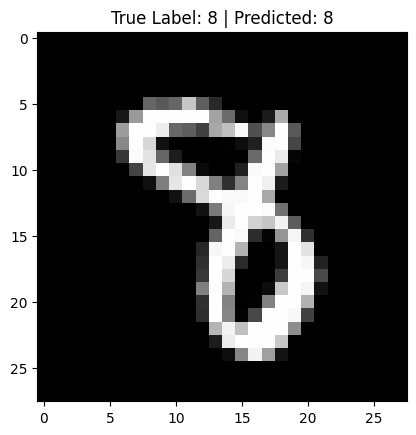

In [42]:
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

prediction = model.predict(X_test[i].reshape(1, 28, 28, 1))
predicted_label = prediction.argmax()

plt.title(f"True Label: {y_test[i]} | Predicted: {predicted_label}")
plt.show()


# Updated CNN with Dropout

In [ ]:
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25), #Regularization
    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
     layers.Dropout(0.25), #Regularization

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25), #Regularization

    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8439 - loss: 0.4790 - val_accuracy: 0.9843 - val_loss: 0.0509
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9710 - loss: 0.0951 - val_accuracy: 0.9889 - val_loss: 0.0341
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9779 - loss: 0.0704 - val_accuracy: 0.9889 - val_loss: 0.0335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9829 - loss: 0.0574 - val_accuracy: 0.9907 - val_loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9894 - val_loss: 0.0300


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.9894 - loss: 0.0300
Test Accuracy: 0.9894


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


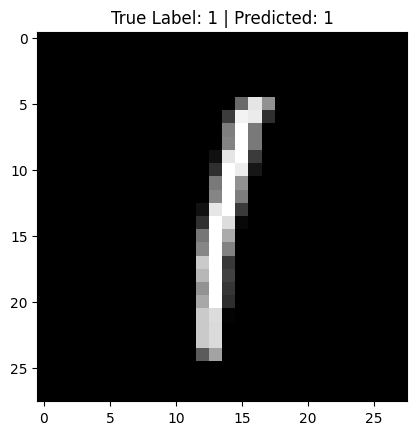

In [44]:
i = np.random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

prediction = model.predict(X_test[i].reshape(1, 28, 28, 1))
predicted_label = prediction.argmax()

plt.title(f"True Label: {y_test[i]} | Predicted: {predicted_label}")
plt.show()


In [45]:
from sklearn.model_selection import train_test_split

# 1. First, split the original training set to create a dedicated validation set
# This takes 10% of your training data and sets it aside for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

# 2. Re-train the model using this dedicated validation set
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9939 - loss: 0.0197 - val_accuracy: 0.9895 - val_loss: 0.0306
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9908 - val_loss: 0.0325
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9927 - val_loss: 0.0304
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9962 - loss: 0.0104 - val_accuracy: 0.9900 - val_loss: 0.0396


In [46]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=50, # Set a high limit, EarlyStopping will catch it
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9965 - loss: 0.0093 - val_accuracy: 0.9917 - val_loss: 0.0321
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9977 - loss: 0.0075 - val_accuracy: 0.9895 - val_loss: 0.0379
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9832 - val_loss: 0.0604
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9873 - val_loss: 0.0514


# Tasks: CNN Tasks

- Task 1 – Model Update
  - Add a third Convolutional Layer after the existing layers.
  - Train the updated model on the same dataset (same epochs and batch size).
  - Record the training and validation accuracy/loss after adding the new layer.
  - Compare the performance before and after adding the third Conv layer.

  - Discuss:

    - Did accuracy improve or drop?
    - Did overfitting increase?
    - How did training time change?

- Task 2 – Image Testing
  - Load a sample image from your computer (paint).
  - Preprocess it (resize, normalize, reshape).
  - Use the trained model to predict the class.
  - Display both the image and the predicted label.

- Task 3-  Check Dataset Splitting and fix it
    - And Discuss:

    - Did accuracy improve or drop?
    - Did overfitting increase?
    - How did training time change?

  
- Task 4 — EarlyStopping Behavior Analysis
Enable EarlyStopping with:
    ```python
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ```
    Analyze:

    1. At which epoch did training stop?  
    2. Why does the validation loss control this decision?  
    3. What happens if you increase patience (to 5 and to 10)?  
    4. Explain how EarlyStopping acts as an indirect form of regularization.

- Task 5 — Compare between ANN and CNN

---

In [47]:
#  ta 5
ann_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
from tensorflow.keras import layers, models

# 1
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary() # لمشاهدة عدد البارامترات الجديد

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def test_custom_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (28, 28))
    img_inverted = cv2.bitwise_not(img_resized)
    img_final = img_inverted / 255.0
    img_final = img_final.reshape(1, 28, 28, 1)
    prediction = model.predict(img_final)
    predicted_label = np.argmax(prediction)
    plt.imshow(img_inverted, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()



In [51]:


# task 3  ماشي
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


X_train_full = X_train_full.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.1,
    random_state=42
)

print(f"Total training samples: {len(X_train)}")
print(f"Total validation samples: {len(X_val)}")


history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Total training samples: 54000
Total validation samples: 6000
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.8662 - loss: 0.4272 - val_accuracy: 0.9758 - val_loss: 0.0791
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9771 - loss: 0.0734 - val_accuracy: 0.9740 - val_loss: 0.0877
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9846 - loss: 0.0472 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9896 - loss: 0.0368 - val_accuracy: 0.9825 - val_loss: 0.0580
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9862 - val_loss: 0.0469


In [52]:
import tensorflow as tf
# task 4 okkay
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=3,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 35ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9862 - val_loss: 0.0506
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9955 - loss: 0.0131 - val_accuracy: 0.9833 - val_loss: 0.0630
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9855 - val_loss: 0.0596
